# Jakub Kuciński

## Zad2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
import scipy.stats

%matplotlib inline

In [3]:
def binary_random(p):
    if np.random.uniform(0, 1) < p:
        return 1
    return 0

In [4]:
def initial_probability_vector(d):
    return np.zeros(d) + 0.5

In [5]:
def random_individual(p, d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = np.random.choice(2, p=[1-p[i], p[i]])
    return x

In [6]:
def random_population(p, d, N):
    pop = np.zeros((N, d))
    for k in range(N):
        pop[k, :] = random_individual(p, d)
    return pop

In [7]:
def population_evaluation(pop, F):
    res = np.zeros(pop.shape[0])
    for i in range(pop.shape[0]):
        res[i] = F(pop[i, :])
    return res

In [8]:
# xs = np.clip(xs, min_val, max_val)
def cut_to_zero_one(p):
    if p < 0:
        return 0
    if p > 1:
        return 1
    return p

In [9]:
def pbil(F, d=10, N=100, Theta1=0.01, Theta2=0.05, Theta3=0.01, T=100, 
         verbose=False, targets=False, probabilities=False):
    if verbose:
        t0 = time.time()
    p = initial_probability_vector(d)
    pop = random_population(p, d, N)
    res = population_evaluation(pop, F)
    if targets:
        target = np.zeros(T)
    if probabilities:
        prob = np.zeros((T, d))
    for t in range(T):
        if verbose and t % 100 == 0:
            print(t, time.time() - t0)
        i = np.argmax(res)
        x = pop[i]
        if targets:
            target[t] = res[i]
        if probabilities:
            prob[t, :] = p
        for k in range(d):
            p[k] = p[k] * (1 - Theta1) + x[k] * Theta1
            p[k] = cut_to_zero_one(p[k])
        for k in range(d):
            if np.random.uniform(0, 1) < Theta2:
                p[k] = p[k] * (1 - Theta3) + binary_random(0.5) * Theta3
            p[k] = cut_to_zero_one(p[k])
        pop = random_population(p, d, N)
        res = population_evaluation(pop, F)
    if verbose:
        print(time.time() - t0)
    if targets and probabilities:
        return p, target, prob
    if targets:
        return p, target
    if probabilities:
        return p, prob
    return p

In [10]:
def OneMax(x):
    return x.sum()

In [11]:
def DeceptiveOneMax(x):
    if np.all(x == 0):
        return x.shape[0] + 1
    return np.sum(x)

In [12]:
def KDeceptiveOneMax(k):
    def fun(x):
        n = x.shape[0]
        part_len = n // k
        value = 0
        for j in range(k):
            value += DeceptiveOneMax(x[j*part_len:(j+1)*part_len])
        if part_len * k != n:
            value += DeceptiveOneMax(x[part_len*k:])
        return value
    return fun

In [55]:
p, target, prob = pbil(OneMax, d=100, N=125, T=1000, verbose=True, targets=True, probabilities=True)

0 0.2400646209716797
100 24.080039024353027
200 46.68144989013672
300 69.44013667106628
400 91.90974926948547
500 114.47983503341675
600 137.0317349433899
700 159.81858086585999
800 182.66759181022644
900 205.41236114501953
228.24972796440125


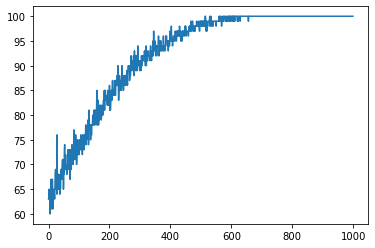

In [56]:
plt.figure()
plt.plot(target)
plt.show()

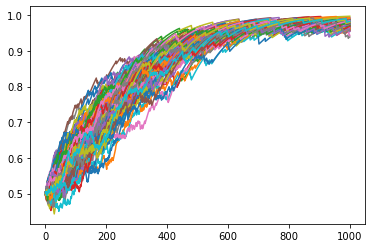

In [57]:
plt.figure()
plt.plot(prob)
plt.show()

In [13]:
p, target, prob = pbil(OneMax, d=20, N=125, T=200, Theta1=0.05, Theta2=0.10, Theta3=0.01, verbose=True, targets=True, probabilities=True)

0 0.055748701095581055
100 4.417283058166504
8.71538233757019


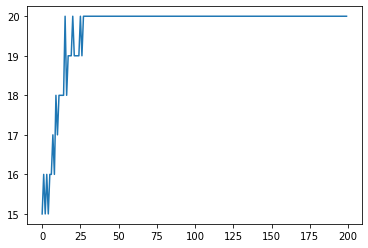

In [14]:
plt.figure()
plt.plot(target)
plt.show()

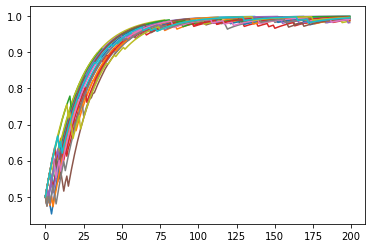

In [15]:
plt.figure()
plt.plot(prob)
plt.show()

In [16]:
p, target, prob = pbil(DeceptiveOneMax, d=50, N=125, T=500, Theta1=0.01, Theta2=0.05, Theta3=0.01, verbose=True, targets=True, probabilities=True)

0 0.11578011512756348
100 10.708149433135986
200 21.219226360321045
300 31.676825046539307
400 42.16274094581604
52.68329477310181


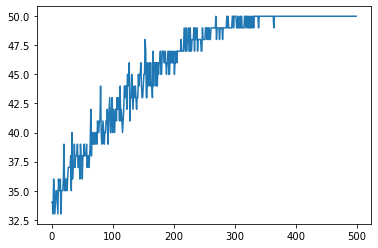

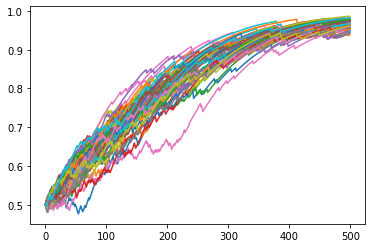

In [17]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [18]:
p, target, prob = pbil(DeceptiveOneMax, d=100, N=125, T=1000, Theta1=0.01, Theta2=0.05, Theta3=0.01, verbose=True, targets=True, probabilities=True)

0 0.23987483978271484
100 21.230245113372803
200 42.22930884361267
300 63.14739799499512
400 84.14921402931213
500 105.18946862220764
600 126.28046536445618
700 147.4630789756775
800 168.69044876098633
900 189.95859217643738
210.90723276138306


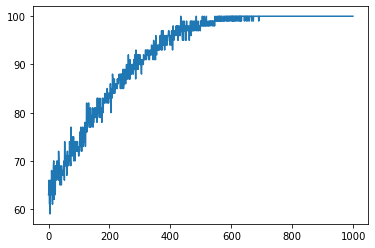

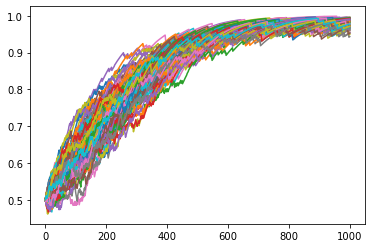

In [19]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [20]:
p, target, prob = pbil(DeceptiveOneMax, d=100, N=125, T=1000, Theta1=0.02, Theta2=0.1, Theta3=0.02, verbose=True, targets=True, probabilities=True)

0 0.24736952781677246
100 21.718865156173706
200 42.842480182647705
300 63.887595653533936
400 84.74210286140442
500 105.81351041793823
600 126.64028787612915
700 147.51350045204163
800 168.46584343910217
900 189.48793244361877
210.6280002593994


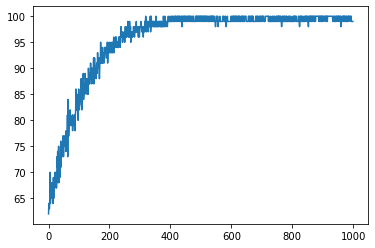

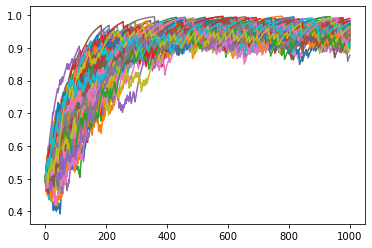

In [21]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [22]:
p, target, prob = pbil(DeceptiveOneMax, d=100, N=125, T=1000, Theta1=0.005, Theta2=0.15, Theta3=0.005, verbose=True, targets=True, probabilities=True)

0 0.23173809051513672
100 21.472307205200195
200 42.39270615577698
300 63.343663930892944
400 84.31097674369812
500 105.23117804527283
600 126.28092360496521
700 147.17669010162354
800 168.0707094669342
900 189.03368949890137
209.9973659515381


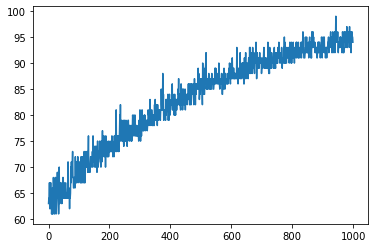

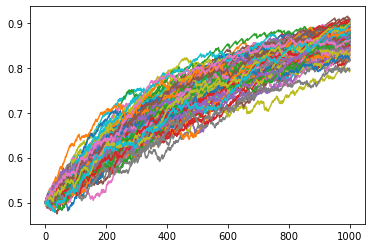

In [23]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [24]:
p, target, prob = pbil(DeceptiveOneMax, d=50, N=125, T=1000, Theta1=0.005, Theta2=0.15, Theta3=0.005, verbose=True, targets=True, probabilities=True)

0 0.12961483001708984
100 11.147193431854248
200 22.19101047515869
300 32.67465925216675
400 43.26119303703308
500 53.77461814880371
600 64.51616764068604
700 76.16585063934326
800 89.33722925186157
900 102.776362657547
116.12947940826416


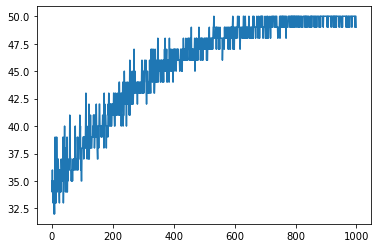

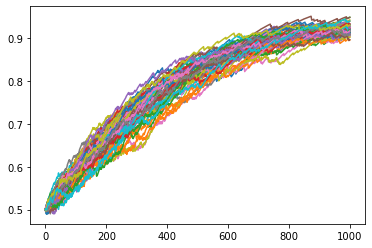

In [25]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [26]:
p, target, prob = pbil(KDeceptiveOneMax(10), d=100, N=125, T=1000, Theta1=0.01, Theta2=0.05, Theta3=0.01, verbose=True, targets=True, probabilities=True)

0 0.253950834274292
100 23.16539764404297
200 45.85740256309509
300 68.47085356712341
400 90.67666602134705
500 112.86420130729675
600 135.2937490940094
700 157.50702786445618
800 179.76308298110962
900 201.93866562843323
224.429669380188


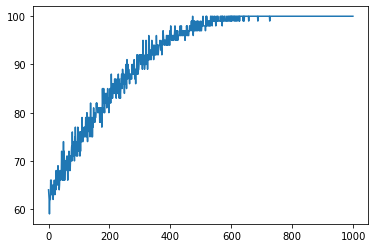

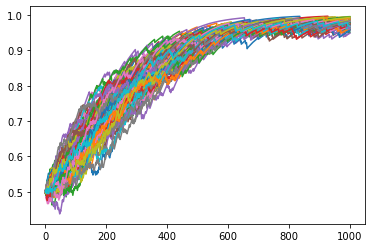

In [27]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [28]:
p, target, prob = pbil(KDeceptiveOneMax(20), d=100, N=125, T=1000, Theta1=0.01, Theta2=0.15, Theta3=0.02, verbose=True, targets=True, probabilities=True)

0 0.24988269805908203
100 23.336995124816895
200 46.33270192146301
300 69.4182755947113
400 92.81709313392639
500 116.92661309242249
600 140.16941499710083
700 165.2773015499115
800 189.85164284706116
900 213.15694570541382
236.7848834991455


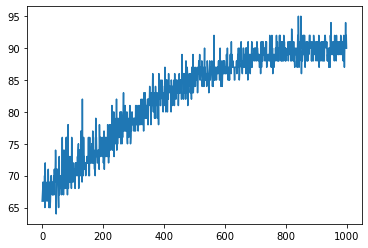

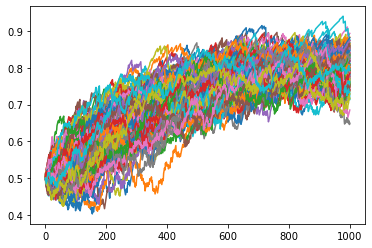

In [29]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [30]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=1000, Theta1=0.01, Theta2=0.15, Theta3=0.02, verbose=True, targets=True, probabilities=True)

0 0.254270076751709
100 24.271426677703857
200 47.67652630805969
300 70.7127993106842
400 93.79783701896667
500 116.83713984489441
600 139.95214915275574
700 163.14216947555542
800 186.2666745185852
900 209.5099573135376
232.55266094207764


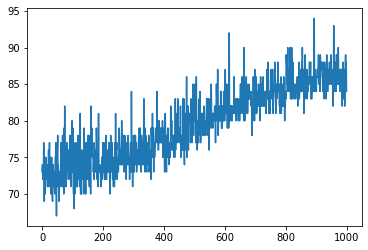

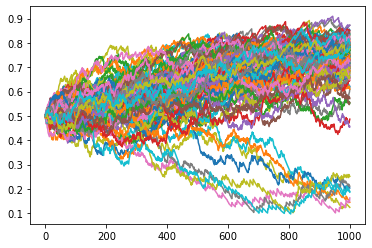

In [31]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [32]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=2000, Theta1=0.01, Theta2=0.05, Theta3=0.03, verbose=True, targets=True, probabilities=True)

0 0.24582552909851074
100 24.164499759674072
200 47.59492063522339
300 72.24736976623535
400 95.9751238822937
500 121.59614610671997
600 147.65336203575134
700 172.673077583313
800 196.42521476745605
900 219.4279625415802
1000 242.4180932044983
1100 265.37501859664917
1200 288.0918641090393
1300 311.09503078460693
1400 334.24605417251587
1500 357.31299471855164
1600 380.2747960090637
1700 403.2220480442047
1800 426.2764518260956
1900 449.1840054988861
472.08045053482056


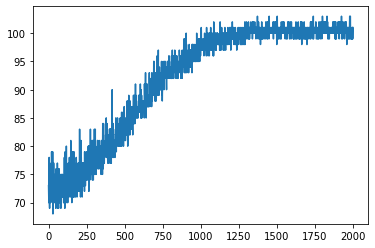

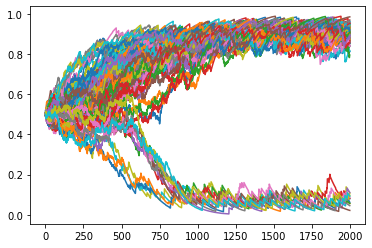

In [33]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [34]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=2000, Theta1=0.01, Theta2=0.05, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 0.26475977897644043
100 23.927561283111572
200 47.05648350715637
300 70.56617164611816
400 93.72445368766785
500 116.74206137657166
600 140.35959672927856
700 164.15987706184387
800 187.4764907360077
900 210.5484321117401
1000 233.58334517478943
1100 256.8768343925476
1200 280.21445178985596
1300 303.20120573043823
1400 326.3192458152771
1500 349.218225479126
1600 371.93313813209534
1700 395.5378909111023
1800 418.4470648765564
1900 441.3204917907715
464.3017554283142


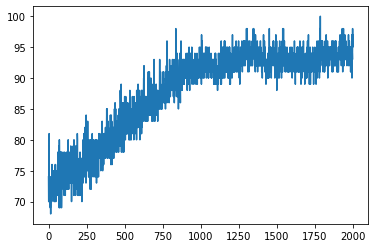

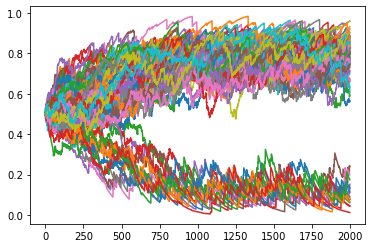

In [35]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [36]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=2000, Theta1=0.01, Theta2=0.03, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 0.2477567195892334
100 24.05578637123108
200 47.37976789474487
300 70.2397689819336
400 93.2761082649231
500 116.09844613075256
600 138.9771740436554
700 161.7337610721588
800 184.4501211643219
900 207.32978749275208
1000 230.21885299682617
1100 253.0522313117981
1200 276.39571261405945
1300 300.36299753189087
1400 324.48449897766113
1500 348.5675537586212
1600 371.9055254459381
1700 394.8143644332886
1800 417.70070219039917
1900 440.82630491256714
463.81485533714294


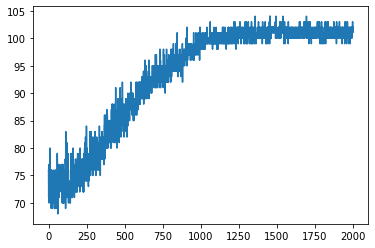

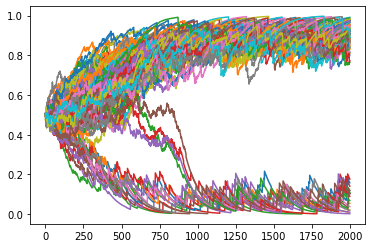

In [37]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [38]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=2000, Theta1=0.01, Theta2=0.02, Theta3=0.07, verbose=True, targets=True, probabilities=True)

0 0.24351859092712402
100 23.72252058982849
200 46.95913076400757
300 70.19851517677307
400 93.43155550956726
500 116.77877402305603
600 139.81474018096924
700 163.20110607147217
800 186.61815476417542
900 210.90734338760376
1000 233.97206139564514
1100 256.975439786911
1200 279.9527904987335
1300 303.1598083972931
1400 326.2408518791199
1500 349.53088307380676
1600 373.2157566547394
1700 396.4207167625427
1800 419.5258195400238
1900 442.712277173996
465.83590745925903


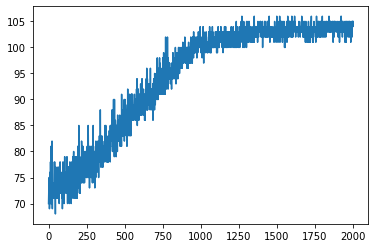

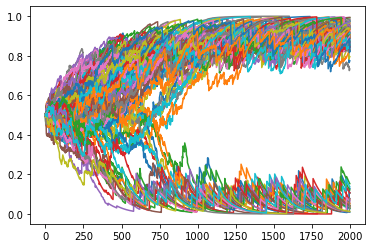

In [39]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [40]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=250, T=1000, Theta1=0.01, Theta2=0.03, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 0.4966893196105957
100 46.894506216049194
200 92.84077906608582
300 138.4721930027008
400 185.00965213775635
500 231.17311906814575
600 280.5659773349762
700 328.03710317611694
800 374.07924938201904
900 419.9653470516205
465.25699949264526


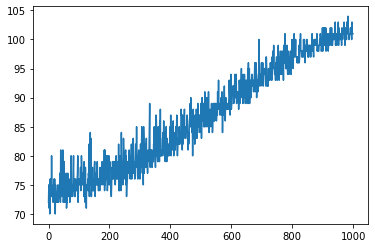

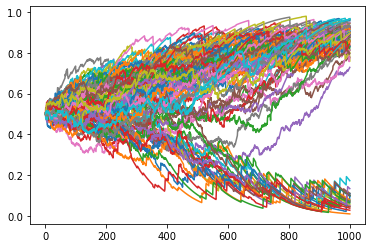

In [41]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [42]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=250, T=1000, Theta1=0.01, Theta2=0.05, Theta3=0.03, verbose=True, targets=True, probabilities=True)

0 0.5100758075714111
100 48.14008331298828
200 94.83713912963867
300 140.79484629631042
400 187.0375325679779
500 233.48053288459778
600 280.29336047172546
700 328.7171437740326
800 376.834614276886
900 422.97892022132874
468.90554332733154


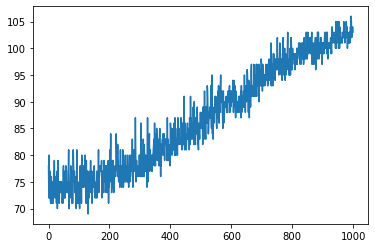

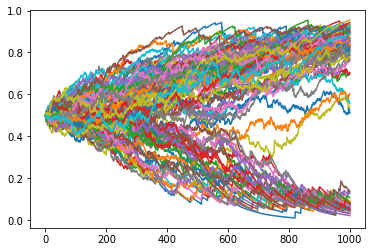

In [43]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [44]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=250, T=1000, Theta1=0.01, Theta2=0.02, Theta3=0.07, verbose=True, targets=True, probabilities=True)

0 0.4977989196777344
100 47.31508183479309
200 97.51533675193787
300 143.64656567573547
400 189.15234994888306
500 234.7567753791809
600 280.43095874786377
700 325.80409121513367
800 373.02950382232666
900 421.50628447532654
467.66797256469727


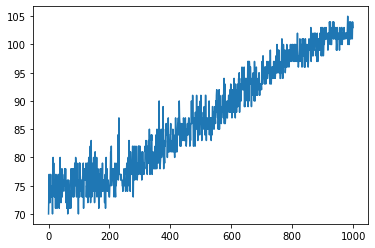

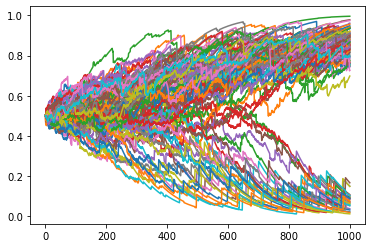

In [45]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [13]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=250, T=2000, Theta1=0.01, Theta2=0.05, Theta3=0.03, verbose=True, targets=True, probabilities=True)

0 0.5320656299591064
100 48.710559129714966
200 96.99453592300415
300 146.0857639312744
400 195.14357781410217
500 246.159677028656
600 295.58288621902466
700 347.71723103523254
800 397.3008978366852
900 448.9089136123657
1000 500.466819524765
1100 550.0113482475281
1200 599.0833241939545
1300 648.149735212326
1400 697.4807786941528
1500 746.6079561710358
1600 797.7077920436859
1700 846.6988575458527
1800 894.6501078605652
1900 942.9801619052887
991.6430473327637


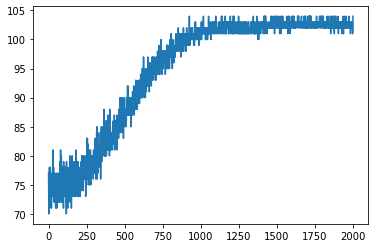

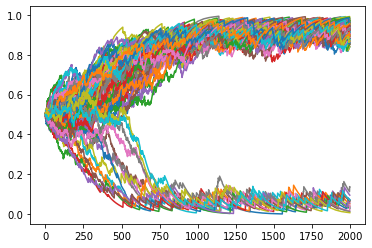

In [14]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [15]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=500, T=1000, Theta1=0.01, Theta2=0.05, Theta3=0.03, verbose=True, targets=True, probabilities=True)

0 1.0949783325195312
100 97.7965943813324
200 193.59288573265076
300 288.8195366859436
400 384.10007762908936
500 479.85204815864563
600 574.4874370098114
700 671.348503112793
800 766.5763595104218
900 864.5952413082123
966.1424543857574


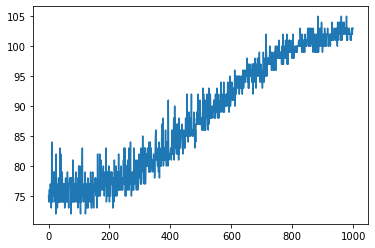

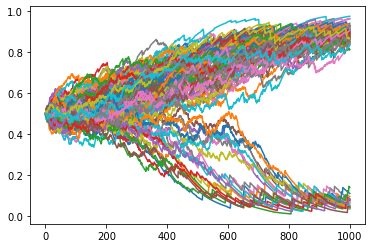

In [16]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [17]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=125, T=1000, Theta1=0.05, Theta2=0.10, Theta3=0.10, verbose=True, targets=True, probabilities=True)

0 0.26575613021850586
100 24.90209460258484
200 48.9286847114563
300 74.02052330970764
400 98.50575423240662
500 122.59854221343994
600 146.71747994422913
700 171.29764437675476
800 195.25310802459717
900 218.85107278823853
243.21197319030762


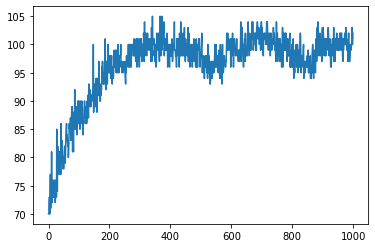

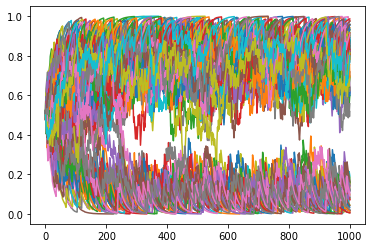

In [18]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()

In [19]:
p, target, prob = pbil(KDeceptiveOneMax(25), d=100, N=250, T=1000, Theta1=0.05, Theta2=0.10, Theta3=0.10, verbose=True, targets=True, probabilities=True)

0 0.5167357921600342
100 50.15423607826233
200 99.94430446624756
300 150.04795575141907
400 198.4295949935913
500 246.72184348106384
600 295.80928897857666
700 344.65212297439575
800 394.51487278938293
900 444.57976245880127
493.4769024848938


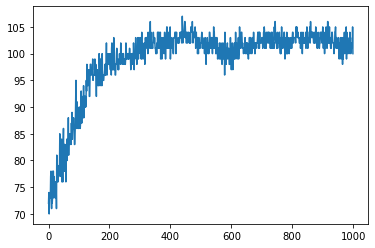

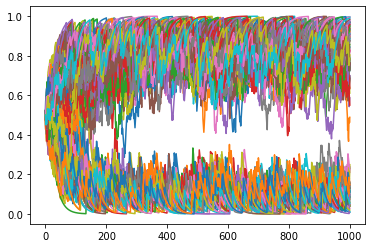

In [20]:
plt.figure()
plt.plot(target)
plt.show()
plt.figure()
plt.plot(prob)
plt.show()